# <span style="color:blue"> Average atlas creation

**Content under Creative Commons Attribution license CC-BY-NC-SA 4.0**  
**Code under GNU-GPL v3 License**  
**© 2023 Francesco Chiumento**

This code creates an Average Atlas by registering MRI DICOM files of patients onto a reference MRI DICOM file. Using binary masks of the reference patient's femoral cartilage and femur, the registration process is guided. All transformations are tracked, and the moving binary masks of each patient are registered for testing purposes. Finally, all registered MRI DICOMs and their masks are averaged.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

base_dir = os.getcwd()
code = os.path.join(base_dir, "code")

# Add the combined path to sys.path
sys.path.append(code)

import average_atlas as atl

Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).


## Path configuration

- In the *__reference_folder__*, there is the reference image. Inside the *reference* folder, there are two subfolders named: __femur_mask__ and __cartilage_mask__. Within these subfolders, it is necessary to place the binary masks corresponding to the reference image. Only the .mha file of the reference image must be named __reference.mha__ mandatorily;
- In the *__moving_images__* folder, there are MRIs of patients "in motion". These patients have already been pre-processed with pyKNEEr;
- In the *__moving_images_directory__* folder, two subfolders should be placed, which should have the same name as the patients stored in the *moving_images* folder. Inside each subfolder, there are binary masks of the femur and the femoral cartilage of the patients. These masks should be named after the patient's folder name; the femoral cartilage mask should end with *cartilage_mask* and the femur mask should end with *femur_mask*.


## Dilation of binary masks

Dilation of the masks is performed to facilitate the image registration process.

In [3]:
atl.dilate_mask_function(base_dir)

Dilated binary masks


## Registration of moving images 

In this step, all the .mha files of the moving images are registered to the reference image.

In [4]:
moving_files_path, transform_parameters_dict = atl.register_moving_images_function(base_dir)


Starting registration for C:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_AV0_prep.mha

Registration of the femur completed for C:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_AV0_prep.mha in 292.54 seconds.

Starting second phase registration for C:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_AV0_prep.mha

Registration of the femural cartilage completed for C:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_AV0_prep.mha in 292.54 seconds.


Starting registration for C:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_BA0_prep.mha

Registration of the femur completed for C:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_BA0_prep.mha in 303.02 seconds.

Starting second phase registration for C:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_BA0_prep.mha

Registration of the femural cartilage completed for C:\Users\franc\OneDrive\Desktop\Testing\moving

## Registration of the masks

In this final step, the binary masks of the femur and femoral cartilage of the patients are registered to the moving images that were previously registered to the reference.
The transformation of the masks is possible by applying the same transformations made on the moving images using *Transformix*.

Inside the Outputs folder, there will be folders of the registered patients. Within each folder, there will be three subfolders:

- *__phase1_femur__*: in this folder, the first phase of registration takes place, guided by the binary mask of the reference femur;
- *__phase2_femur__*: in this folder, there is the binary mask of the femur of the registered moving image;
- *__phase2_cartilage__*: in this folder, there is the moving image registered after the two phases guided by the reference masks and the mask of the femoral cartilage of the registered moving image.

In [5]:
for moving_image_path in moving_files_path:
    file_name = os.path.basename(moving_image_path).replace('.mha', '')
    specific_transform_parameters = transform_parameters_dict[file_name]
    atl.register_masks_for_image(base_dir, moving_image_path, specific_transform_parameters)

Starting registration 1 of the femural mask C:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_AV0_prep.mha

Transformation 1 of the femural maskC:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_AV0_prep.mha completed in  82.87 seconds.

Starting registration 2 of the femural mask C:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_AV0_prep.mha

Transformation 2 of the femural maskC:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_AV0_prep.mha completed in  133.07 seconds.

Starting registration 1 of the femural cartilage mask C:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_AV0_prep.mha

Transformation 1 of the femural cartilage maskk C:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_AV0_prep.mha completed in 61.29 seconds.

Starting registration 2 of the femural cartilage mask C:\Users\franc\OneDrive\Desktop\Testing\moving_images\01_Sag_DP_Cube_AV0_prep.mha

Transformation 2

## Calculation of the Average images

In this final phase, the average Atlas is calculated, as well as the average binary masks of the femur and femoral cartilage.

In [6]:
atl.compute_atlas_function(base_dir)

Calculation of the average image of the registered images...

Average image of the registered images calculated

Average image saved

Calculation of then average image for the femural mask...

Average image for the femural mask calculated

Calculation of then average image for the femural cartilage mask...

Average image for the femural cartilage mask calculated

Calculated and saved binarized average mask.


## Average atlas visualization

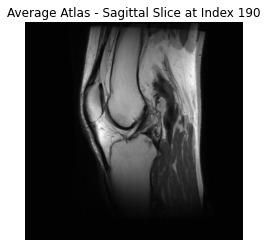

In [7]:
atl.show_average_atlas(base_dir,190)

## References

[1]  
__Paper__: Bonaretti S., Gold G., Beaupre G. pyKNEEr: [*An image analysis workflow for open and reproducible research on femoral knee cartilage*](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0226501) PLOS ONE 15(1): e0226501  
__Code__: Bonaretti S. pyKNEEr. Zenodo. 2019. 10.5281/zenodo.2574171 [*Link*](https://zenodo.org/records/7695948)  
__Data__: Dataset in (Bonaretti S. et al. 2019). Zenodo. 10.5281/zenodo.2583184 [*Link*](https://zenodo.org/records/2583184)  
[2] Carballido-Gamio, J. [*Generation of an atlas of the proximal femur and its application to trabecular bone analysis*](https://pubmed.ncbi.nlm.nih.gov/21432904/)


## Computer system details

In [8]:
%reload_ext watermark
%watermark

Last updated: 2024-03-19T02:49:50.935319+01:00

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit

